In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt 
%matplotlib inline

Загрузка датасета

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Предобработка данных

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

Просмотр примера

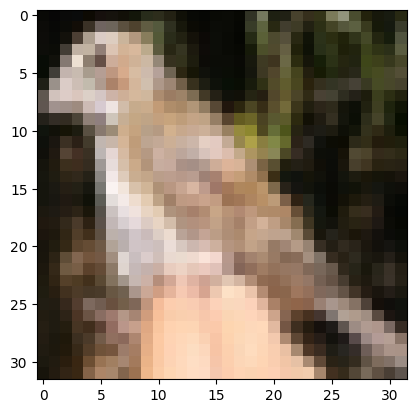

Номер класса: [2]
Тип объекта: птица


In [ ]:
n = 9588
plt.imshow(x_train[n])
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

Определение модели

In [ ]:
model = keras.Sequential(
[
layers.Input(shape=(32, 32, 3)),
layers.Conv2D(32, 3, activation="relu"),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Conv2D(64, 3, activation="relu"),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Conv2D(128, 3, activation="relu"),
layers.Flatten(),
layers.Dense(64, activation="relu"),
layers.Dense(10),
]
)

Компиляция модели

In [ ]:
model.compile(
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer=tf.keras.optimizers.Adam(lr=0.001),
metrics=["accuracy"],
)

Обучение модели

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=2)

Epoch 1/20
782/782 - 71s - loss: 2.0577 - accuracy: 0.3971 - 71s/epoch - 91ms/step
Epoch 2/20
782/782 - 72s - loss: 1.2933 - accuracy: 0.5417 - 72s/epoch - 92ms/step
Epoch 3/20
782/782 - 70s - loss: 1.1383 - accuracy: 0.6011 - 70s/epoch - 89ms/step
Epoch 4/20
782/782 - 70s - loss: 1.0246 - accuracy: 0.6433 - 70s/epoch - 89ms/step
Epoch 5/20
782/782 - 70s - loss: 0.9455 - accuracy: 0.6710 - 70s/epoch - 90ms/step
Epoch 6/20
782/782 - 69s - loss: 0.8720 - accuracy: 0.6956 - 69s/epoch - 88ms/step
Epoch 7/20
782/782 - 70s - loss: 0.8073 - accuracy: 0.7190 - 70s/epoch - 90ms/step
Epoch 8/20
782/782 - 69s - loss: 0.7354 - accuracy: 0.7433 - 69s/epoch - 88ms/step
Epoch 9/20
782/782 - 69s - loss: 0.6899 - accuracy: 0.7578 - 69s/epoch - 88ms/step
Epoch 10/20
782/782 - 70s - loss: 0.6248 - accuracy: 0.7824 - 70s/epoch - 90ms/step
Epoch 11/20
782/782 - 69s - loss: 0.5876 - accuracy: 0.7950 - 69s/epoch - 88ms/step
Epoch 12/20
782/782 - 69s - loss: 0.5242 - accuracy: 0.8173 - 69s/epoch - 88ms/step
E

Тестирование модели

In [ ]:
scores = model.evaluate(x_test, y_test, batch_size=64, verbose=2)
print("Доля верных ответов на тестовых данных: %.2f%%" % (scores[1]*100))

157/157 - 5s - loss: 1.6624 - accuracy: 0.6598 - 5s/epoch - 32ms/step
Доля верных ответов на тестовых данных: 65.98%


Просмотр изображения для тестирования

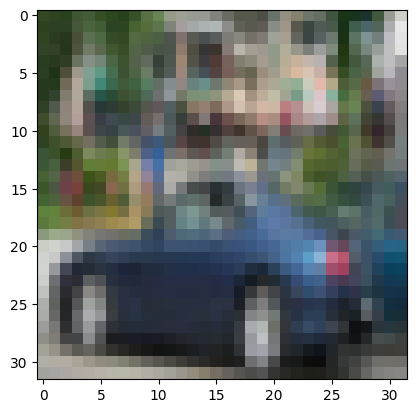

In [ ]:
index=122
plt.imshow(x_test[index])
plt.show()

Преобразование изображения

In [ ]:
import numpy as np

x = x_test[index]
x = np.expand_dims(x, axis=0)

Распознавание

In [ ]:
prediction = model.predict(x)

1/1 [==============================] - 0s 121ms/step


Результаты

In [ ]:
print(prediction)
prediction = np.argmax(prediction)
print(classes[prediction])

[[ 6.13558   12.8667     2.4938493  3.9776921  5.3950872  0.3334075
   5.3008947  3.9773984  5.890193   8.261513 ]]
автомобиль
